# Séries Temporais

In [1]:
#Importando os pacotes necessários
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

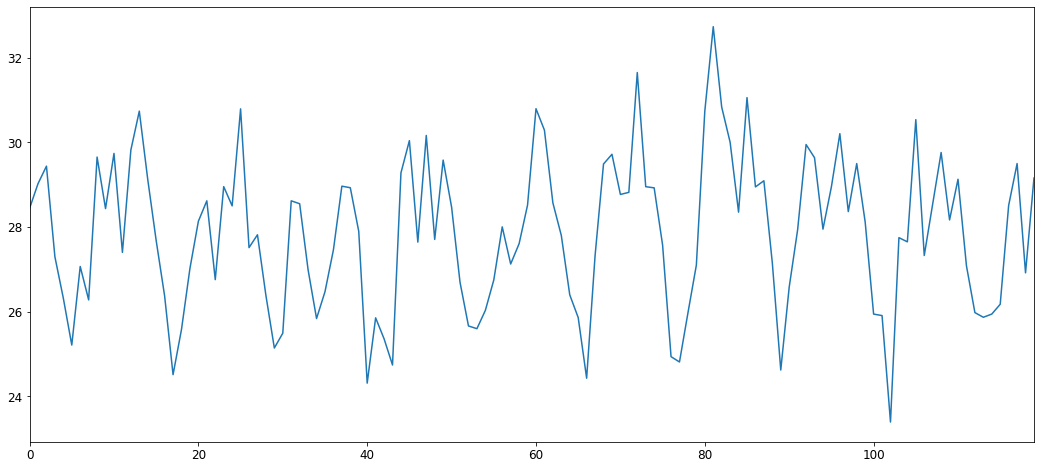

In [2]:
#Leitura dos dados
y=pd.Series([28.44194,29.02500,29.43871,27.29667,26.31613,25.21000,27.06774,26.27742,
29.65333,28.43548,29.74000,27.40000,29.81935,30.73929,29.12581,27.68000,
26.37097,24.51000,25.58065,27.02258,28.13667,28.61935,26.75667,28.95484,
28.50000,30.79286,27.51290,27.81667,26.38387,25.14000,25.49032,28.61935,
28.55000,26.98710,25.83667,26.47097,27.46129,28.96552,28.92903,27.89667,
24.30968,25.85333,25.35806,24.73871,29.28000,30.04194,27.64333,30.16452,
27.70645,29.58214,28.47097,26.69333,25.66129,25.59667,26.02903,26.74839,
28.00333,27.12581,27.60667,28.51935,30.79677,30.28929,28.57097,27.80000,
26.39677,25.86000,24.42581,27.32258,29.49000,29.71935,28.77000,28.81935,
31.65161,28.95357,28.92581,27.57333,24.93548,24.81000,25.96774,27.10000,
30.73667,32.73548,30.83667,30.00323,28.35161,31.05862,28.94839,29.09333,
27.15161,24.62000,26.58065,27.93871,29.95000,29.63871,27.95000,28.95161,
30.20645,28.36429,29.50000,28.12000,25.94194,25.90667,23.39032,27.74839,
27.65000,30.53871,27.32667,28.54516,29.76129,28.16786,29.12903,27.08333,
25.97742,25.86667,25.94194,26.17419,28.51000,29.50000,26.91667,29.15806])

#Plot da Série
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
y.plot()
plt.show()

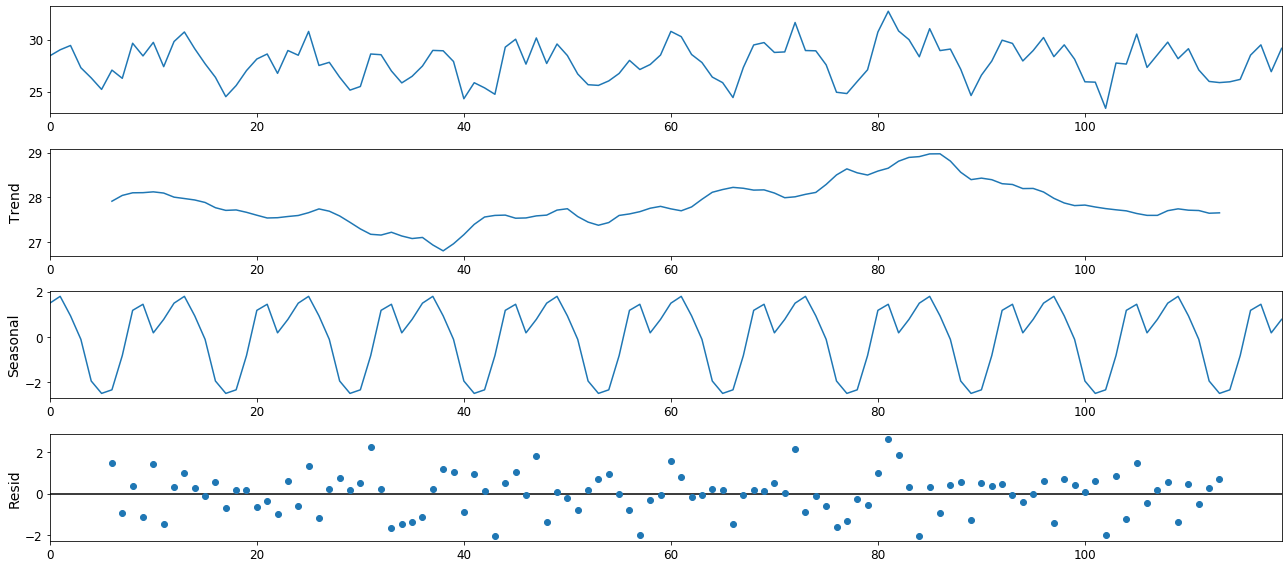

In [3]:
#Decomposição da Série Temporal
decomposition = sm.tsa.seasonal_decompose(y, model='additive',freq=12)
fig = decomposition.plot()
plt.show()

In [4]:
# A função auto-arima 
from pmdarima import auto_arima 

stepwise_fit = auto_arima(y, start_p = 1, start_q = 1, 
                          information_criterion="bic",
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = 0, D = 0, trace = True, max_d=1,max_D=1,
                          random_state=None,max_order=10,
                          error_action ='ignore', 
                          suppress_warnings = True,
                          stepwise = True)          

stepwise_fit.summary() 

Performing stepwise search to minimize bic
Fit ARIMA(1,0,1)x(0,0,1,12) [intercept=True]; AIC=436.987, BIC=450.924, Time=0.259 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=485.949, BIC=491.524, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=427.712, BIC=438.862, Time=0.675 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=439.658, BIC=450.808, Time=0.141 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=1141.505, BIC=1144.292, Time=0.000 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=449.387, BIC=457.750, Time=0.031 seconds
Fit ARIMA(1,0,0)x(2,0,0,12) [intercept=True]; AIC=415.845, BIC=429.782, Time=2.150 seconds
Fit ARIMA(1,0,0)x(2,0,1,12) [intercept=True]; AIC=417.061, BIC=433.786, Time=1.832 seconds
Fit ARIMA(1,0,0)x(1,0,1,12) [intercept=True]; AIC=411.822, BIC=425.759, Time=0.709 seconds
Fit ARIMA(1,0,0)x(0,0,1,12) [intercept=True]; AIC=435.131, BIC=446.281, Time=0.463 seconds
Fit ARIMA(1,0,0)x(1,0,2,12) [intercept=True]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -200.911
Date:                              Sun, 02 Aug 2020   AIC                            411.822
Time:                                      09:54:15   BIC                            425.759
Sample:                                           0   HQIC                           417.482
                                              - 120                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9911      2.774      1.439      0.150      -1.446       9.429
ar.L1          0.2165      0.104      2.086      0.037       0.013       0.420
ar.S.L12       0.8163      0.121      6.745      0.000       0.579       1.053
ma.S.L12      -0.4476      0.195     -2.298      0.022      -0.829      -0.066
sigma2         1.7219      0.282      6.102      0.000       1.169       2.275
===================================================================================
Ljung-Box (Q):                       52.42   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.09   Prob(JB):                         0.74
Heteroskedasticity (H):               1.32   Skew:                             0.17
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
#Ajuste do modelo com os parâmetros encontrados
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0)
                                ,seasonal_order=(1, 0, 1, 12)
                               )
results = mod.fit()

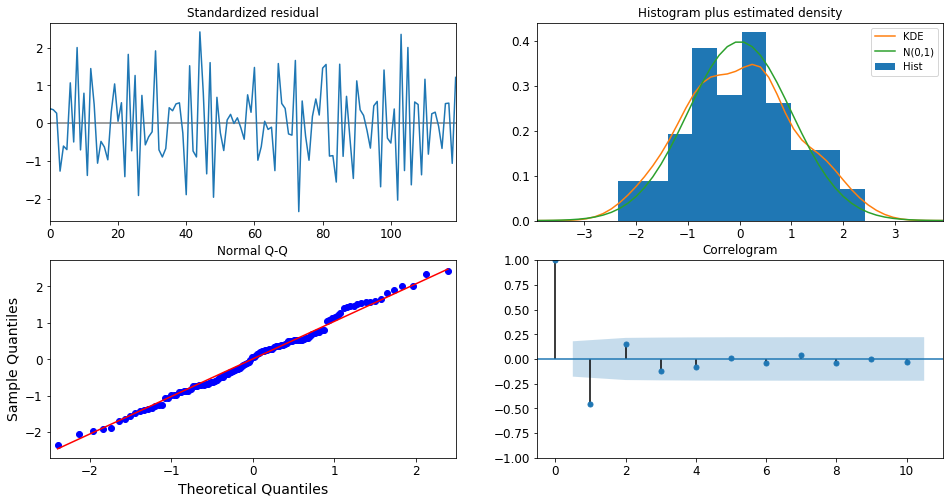

In [6]:
#Análise de resíduos
results.plot_diagnostics(figsize=(16, 8))
plt.show()

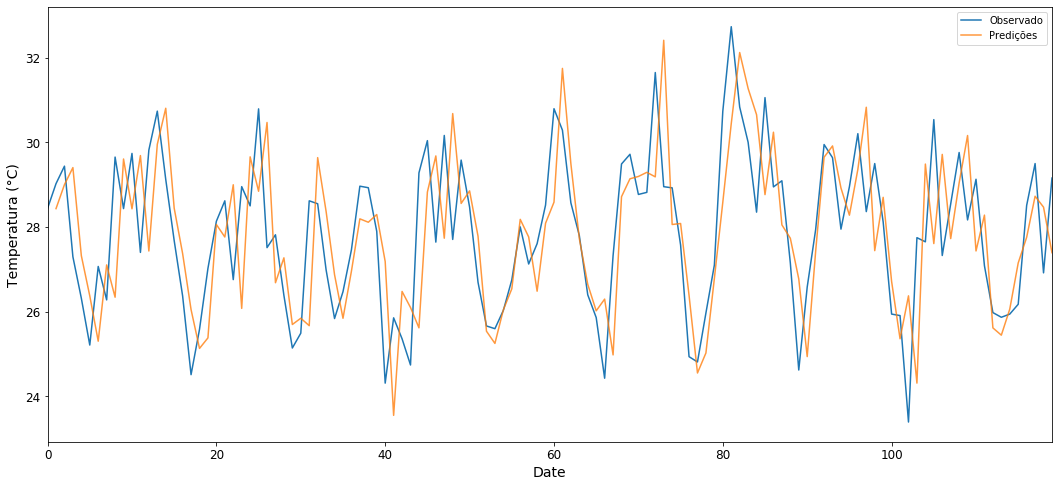

In [7]:
#Visualização do ajuste da série nos dados de treino
pred = results.get_prediction(start=1, dynamic=False)
ax = y.plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Predições', alpha=.8)
ax.set_xlabel('Date')
ax.set_ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [8]:
#Previsões para a base de teste
pred = results.predict(start=len(y)+1, end=len(y)+12,dynamic=False)

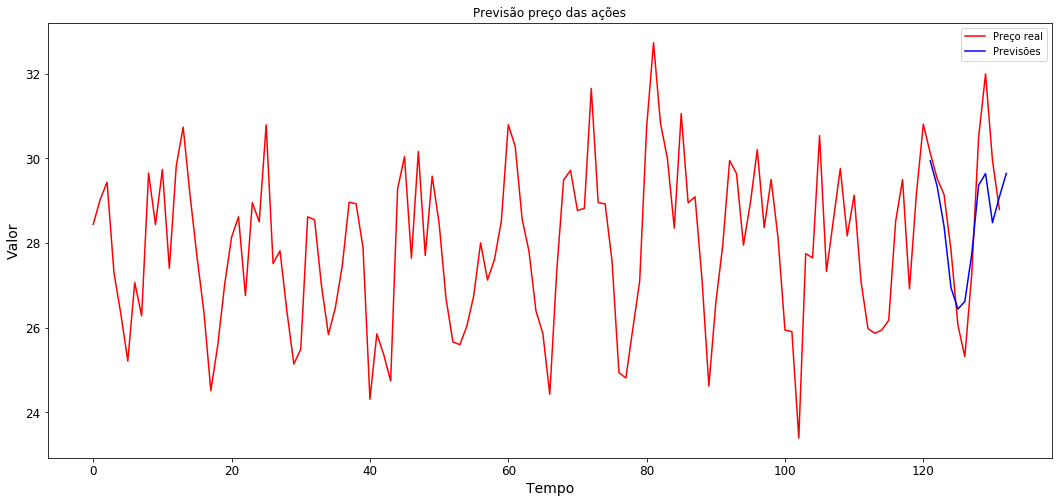

Média previsões: 28.47070805867659
Média real: 28.943411666666663
RMSE: 1.6995849783954624
MAE: 1.4633817611383904


In [9]:
#Gráfico comparativo entre o real e o predito e métricas de desempenho
dados_2019=[30.80968, 30.12857, 29.52581, 29.14333, 27.83226, 26.06333, 25.31290, 27.25484,
            30.50667, 32.00000, 29.95000, 28.79355]
plt.plot(y.tolist()+dados_2019, color = 'red', label = 'Preço real')
plt.plot(pred, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

print("Média previsões:",pred.mean())
print("Média real:",pd.Series(dados_2019).mean())
print("RMSE:",math.sqrt(mean_squared_error(dados_2019,pred)))
print("MAE:",mean_absolute_error(dados_2019,pred))